In [94]:
import pandas as pd
import numpy as np
import pymc3 as pm
import arviz as az
from arviz.plots.plot_utils import xarray_var_iter
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [164]:
RANDOM_SEED = 0
np.random.seed = RANDOM_SEED

#the number of samples
N=15

#establishing prior and getting observed data
theta_real = .5
observed_data=stats.bernoulli.rvs(p=theta_real, size=N)

#the number of heads
k=observed_data.sum()

print(observed_data)
print(f"There are {k} heads")

[1 1 1 1 1 1 1 0 0 0 0 1 1 0 0]
There are 9 heads


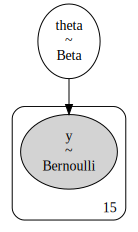

In [165]:
#fit the observed data 
with pm.Model() as coin_flip:
    theta=pm.Beta('theta', alpha=1, beta=1)
    y=pm.Bernoulli('y', theta, observed=observed_data)
    
pm.model_to_graphviz(coin_flip)

In [166]:
with coin_flip:
    step = pm.Metropolis()
    trace = pm.sample(10000, step=step, return_inferencedata=True)

Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [theta]


Sampling 2 chains for 1_000 tune and 10_000 draw iterations (2_000 + 20_000 draws total) took 27 seconds.
The number of effective samples is smaller than 25% for some parameters.


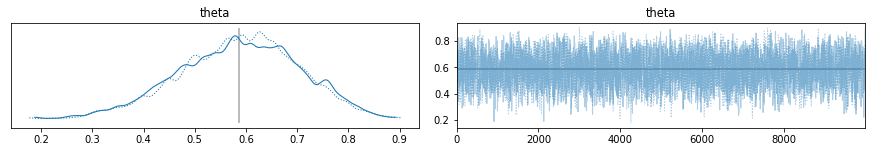

In [167]:
var_names = ["theta"]
lines = list(xarray_var_iter(trace.posterior[var_names].mean(dim=("chain", "draw"))))
az.plot_trace(trace, lines=lines);

In [168]:
with coin_flip:
    step = pm.NUTS()
    trace = pm.sample(10000, step=step, return_inferencedata=True)

Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta]


Sampling 2 chains for 1_000 tune and 10_000 draw iterations (2_000 + 20_000 draws total) took 36 seconds.


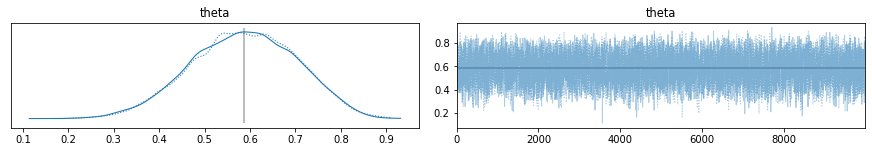

In [169]:
var_names = ["theta"]
lines = list(xarray_var_iter(trace.posterior[var_names].mean(dim=("chain", "draw"))))
az.plot_trace(trace, lines=lines);

In [170]:
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta,0.586,0.116,0.372,0.797,0.001,0.001,8232.0,13600.0,1.0


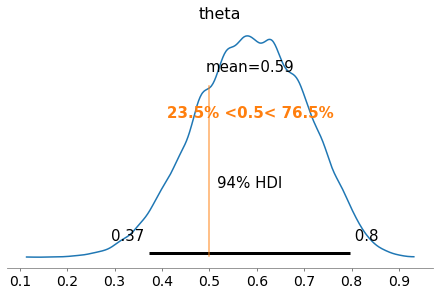

In [171]:
az.plot_posterior(trace, kind='kde', ref_val=0.5);

In [172]:
with coin_flip:
    ppc = pm.sample_posterior_predictive(trace, var_names=['theta', 'y'])

In [173]:
ppc['y'].shape

(20000, 15)

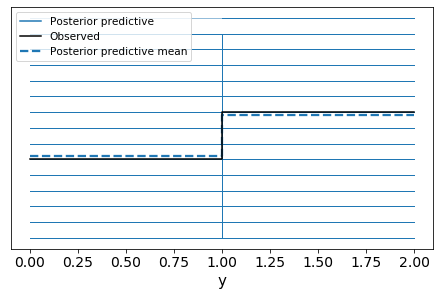

In [174]:
az.plot_ppc(az.from_pymc3(posterior_predictive=ppc, model=coin_flip));

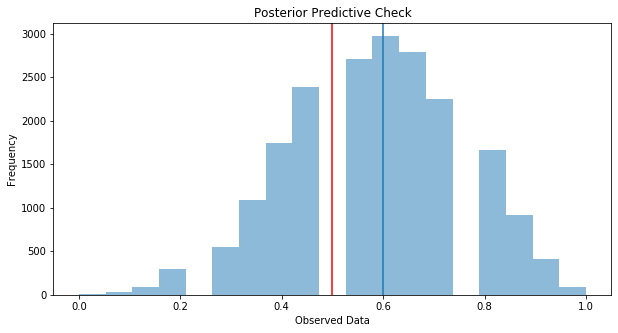

In [175]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist([y.mean() for y in ppc['y']], bins=19, alpha=0.5)
ax.axvline(observed_data.mean())
ax.axvline(0.5, c='r')
ax.set(title='Posterior Predictive Check', xlabel='Observed Data', ylabel='Frequency');

In [148]:
#the number of samples
N_updated=1000

#establishing prior and getting observed data
observed_data_updated=stats.bernoulli.rvs(p=theta_real, size=N_updated)

#the number of heads
k_updated=observed_data_updated.sum()

print(observed_data_updated)
print(f"There are {k_updated} heads")

[0 1 0 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 1
 0 1 1 0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1
 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0
 1 0 0 1 1 0 0 1 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0 1 1
 1 0 1 0 1 1 1 0 0 0 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1
 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1
 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0
 1 1 0 0 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0
 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 1 1
 0 0 1 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 0 0 0 1 1
 0 1 0 1 1 1 0 1 1 0 1 0 

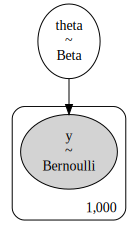

In [149]:
#fit the observed data 
with pm.Model() as coin_flip_updated:
    theta=pm.Beta('theta', alpha=2, beta=2)
    y=pm.Bernoulli('y', theta, observed=observed_data_updated)
    
pm.model_to_graphviz(coin_flip_updated)

In [151]:
with coin_flip_updated:
    step = pm.NUTS()
    trace_updated = pm.sample(10000, step=step, return_inferencedata=True)

Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta]


Sampling 2 chains for 1_000 tune and 10_000 draw iterations (2_000 + 20_000 draws total) took 36 seconds.


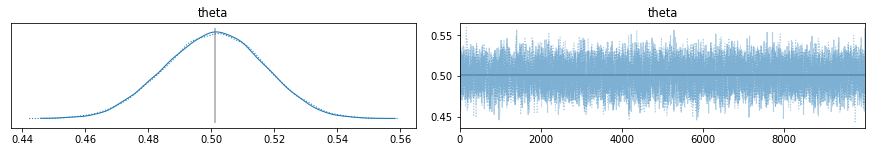

In [152]:
var_names = ["theta"]
lines = list(xarray_var_iter(trace_updated.posterior[var_names].mean(dim=("chain", "draw"))))
az.plot_trace(trace_updated, lines=lines);

In [153]:
az.summary(trace_updated)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta,0.501,0.016,0.472,0.53,0.0,0.0,8082.0,13594.0,1.0


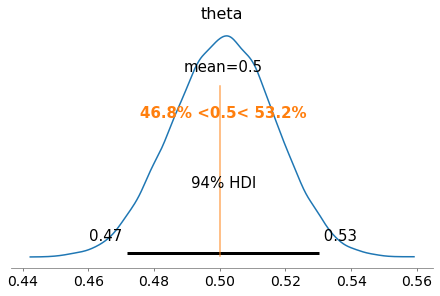

In [154]:
az.plot_posterior(trace_updated, kind='kde', ref_val=0.5);

In [155]:
with coin_flip_updated:
    ppc_updated = pm.sample_posterior_predictive(trace_updated, var_names=['theta', 'y'])

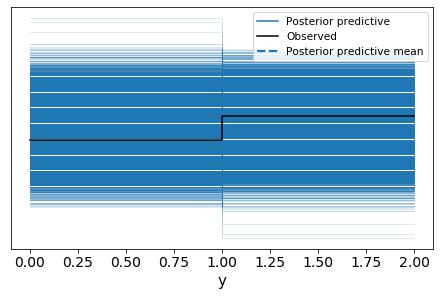

In [156]:
az.plot_ppc(az.from_pymc3(posterior_predictive=ppc_updated, model=coin_flip_updated));

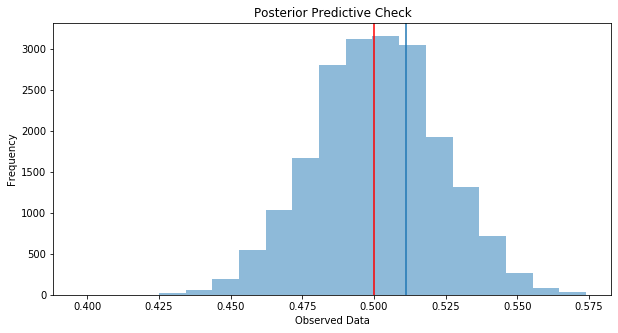

In [158]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist([y.mean() for y in ppc_updated['y']], bins=19, alpha=0.5)
ax.axvline(observed_data_updated.mean())
ax.axvline(0.5, c='r')
ax.set(title='Posterior Predictive Check', xlabel='Observed Data', ylabel='Frequency');